In [1]:
import adi #ADIinstruments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
file = "./SAVNET_RAW_24H.adicht"

In [3]:
data = adi.read_file(file)

In [10]:
pps = data.channels[0]
chn2 =data.channels[1]

In [5]:
with open("structinfo.txt", "w") as f:
    f.write(str(chn2))
    f.close()

In [19]:
data.channels[0].n_records

5

In [17]:

type(data.channels)

list

In [ ]:
2000001600/96000/3600

In [5]:

df = pd.DataFrame()
df[1] = chn2.get_data(1)
df[2] = chn2.get_data(2)
df[3] = chn2.get_data(3)
df[4] = chn2.get_data(4)



In [ ]:
df_pps = pd.DataFrame()

In [9]:
x = data.channels[].get_data(5)

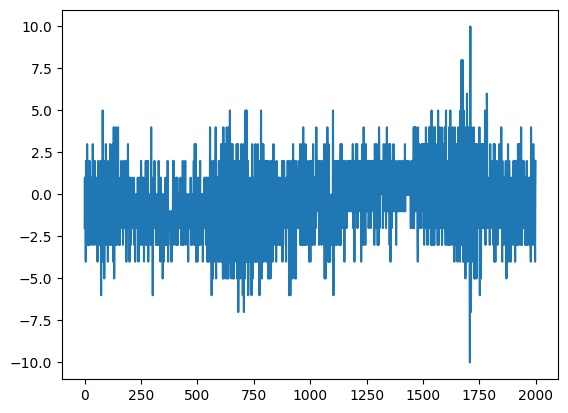

In [13]:
plt.plot(x[:2000])

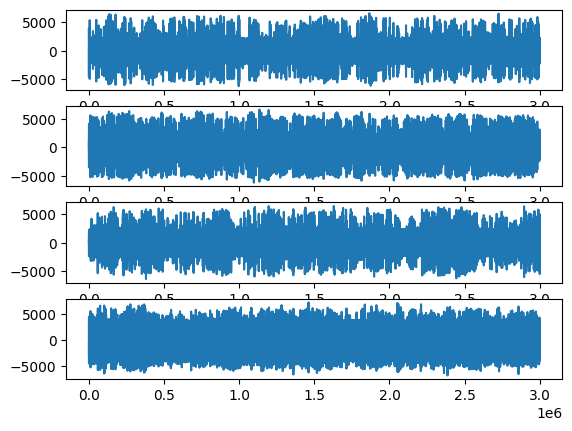

In [12]:
for i in range(1,5):
    plt.subplot(4,1,i)
    plt.plot(df[i].iloc[:3000000])
# cond 

In [23]:
df = data.channels[1]

In [14]:
import scipy

In [17]:
len(df[i])

2000001600

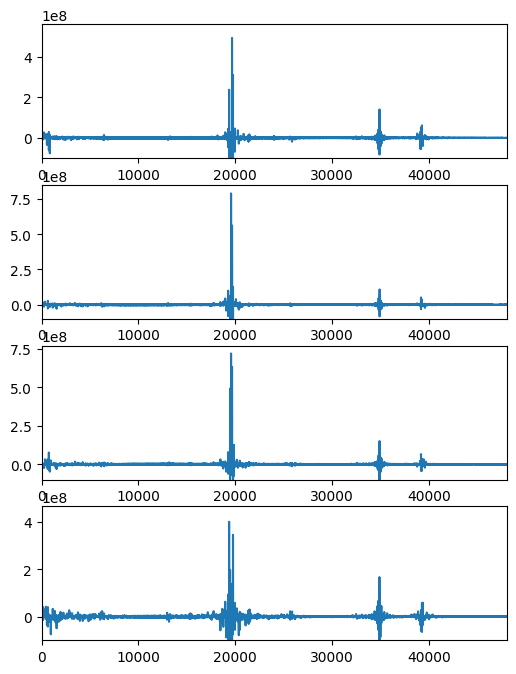

In [22]:
plt.figure(figsize=(6,8))

f = scipy.fft.fftfreq(3000000, 1/96000)
for i in range(1,5):
    s = scipy.fft.fft(df[i].iloc[:3000000].values)
    plt.subplot(4,1,i)
    plt.plot(f,s)    
    plt.xlim(0,48e3)
    plt.ylim(bottom=-1e8)

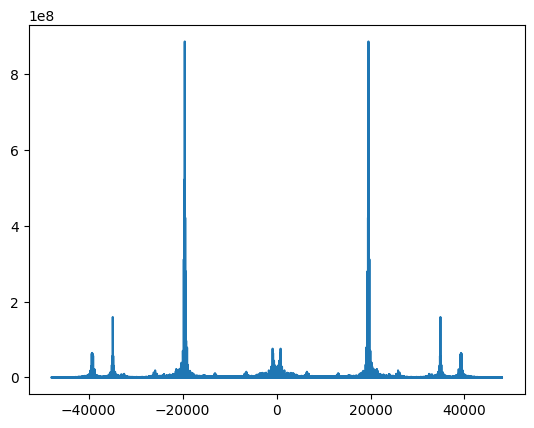

In [43]:
plt.plot(f,abs(s))

## Finally ...
hemos resuelto que el archivo adicht contiene los datos de toda la adqisición por bloques de 5.7 horas (por algún tema de capacidad... I guess...)

In [33]:
for i in range(len(chn2.records)):
    with open(f"savnet_24h_p{i+1}.npy", "wb") as f:
        np.save(f, chn2.get_data(i+1))

In [21]:
for i in range(len(pps.records)):
    with open(f"savnet_24h_PPS_p{i+1}.npy", "wb") as f:
        np.save(f, pps.get_data(i+1))